## Tests statistiques

In [197]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

from common import *

## Exemple 1

- "Durant la semaine qui s'est écoulée combien de fois avez-vous utilisé l'informatique pour faire la classe ? une fois ou moins /
plus d'une fois"
- "Quelle discipline enseignez-vous ? histoire géographie/langues/lettres/math/autres".

Dans cet échantillon, constitué par les réponses de 173 enseignants de collège en France en 2009, y a-t-il un lien statistique entre la fréquence d'utilisation de l'informatique en classe et la discipline enseignée ?

### Notes :
- Il s'agit ici d'analyse univariée, car on ne s'intéresse qu'à une seule variable à la fois.
- On utilise le test du khi-deux, car les variables sont qualitatives nominales (noms de matières) et que l'on compare deux groupes.  

In [198]:

# Create a 2D NumPy array
array_2d = np.array([[35, 10, 22, 15, 10], [6, 10, 20, 19, 19]])

# Create a DataFrame from the 2D array
df = pd.DataFrame(array_2d, columns=['others', 'history', 'langues', 'lettres', "maths"])

df.rename(index={0: 'plus d\'une fois', 1: '1 ou -'}, inplace=True)

df


,others,history,langues,lettres,maths
plus d'une fois,35,10,22,15,10
1 ou -,6,10,20,19,19


In [199]:
df.shape

(2, 5)

In [200]:
test_result = stats.chi2_contingency(df)





test_conclude(test_result)

rounded pvalue = 0.000184535
Chi2ContingencyResult(statistic=22.18010861359148, pvalue=0.00018453504803002114, dof=4, expected_freq=array([[22.72289157, 11.08433735, 23.27710843, 18.84337349, 16.07228916],
       [18.27710843,  8.91566265, 18.72289157, 15.15662651, 12.92771084]]))
pvalue is showing valid study : True.
Le degre de liberté : 4


## Exemple 2

On veut étudier la liaison entre les caractères : « être fumeur » (plus de 20 cigarettes par jour, pendant 10 ans) et « avoir un cancer de la gorge », sur une population de 1000 personnes, dont 500 sont atteintes d’un cancer de la gorge. 

### Notes :
- Il s'agit ici d'analyse univariée, car on ne s'intéresse qu'à une seule variable à la fois.
- On utilise le test du khi-deux, car les variables sont qualitatives nominales et que l'on compare deux groupes.

In [201]:

# Create a 2D NumPy array
array_2d = np.array([[342, 258], [158, 242]])

# Create a DataFrame from the 2D array
df = pd.DataFrame(array_2d, columns=['cancer', 'non cancer'], index=['fumeur', 'non fumeur'])

df['sum'] = df.sum(axis=1)
df.loc['sum'] = df.sum()

df

,cancer,non cancer,sum
fumeur,342,258,600
non fumeur,158,242,400
sum,500,500,1000


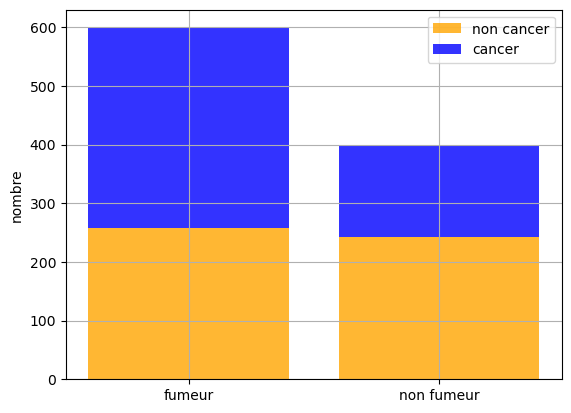

In [202]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

part_1 = [df.loc['fumeur']['non cancer'], df.loc['non fumeur']['non cancer']]

ax.bar(
    ['fumeur', 'non fumeur'],
    part_1,
    label="non cancer",
    color="orange",
    align="center",
    alpha=0.8,
)

part_2 = [df.loc['fumeur']['cancer'], df.loc['non fumeur']['cancer'] ]

ax.bar(
    ['fumeur', 'non fumeur'],
    part_2,
    bottom=part_1,
    label="cancer",
    color="b",
    align="center",
    alpha=0.8,
)

ax.set_ylabel('nombre')
ax.legend(loc="upper right")

ax.grid()

### notes :

- ici on voit que on pourrait glisser dans une analyse multivariée en ajoutant d'autres variables explicatives (âge, sexe, etc.)

In [203]:
real_data = df.iloc[[0,1], [0,1]]

print(real_data.shape)

real_data


(2, 2)


,cancer,non cancer
fumeur,342,258
non fumeur,158,242


In [204]:
test_conclude(stats.chi2_contingency(real_data))

rounded pvalue = 8.43221e-08
Chi2ContingencyResult(statistic=28.704166666666666, pvalue=8.432211190641553e-08, dof=1, expected_freq=array([[300., 300.],
       [200., 200.]]))
pvalue is showing valid study : True.
Le degre de liberté : 1


## Exemple 3

Sur un échantillon de 284 sujets, on a observé la structure par âge ci-dessous. On veut vérifier si cet échantillon diffère de la
structure par âge de la population française.

Note : 

- Ces données catégorielles de classe nominalle (tranche d'âge) sont ici comparé à 2 échantillons de données quantitatives continues ne suivant pas de distribution normale.

In [205]:
# Données
age_ranges = ["0-19", "20-39", "40-59", "60-74", ">74"]
effectif = [73, 82, 75, 36, 18]
percentage_population = [24.6, 28.1, 26, 13.6, 7.7]

# Création du DataFrame
df = pd.DataFrame(
    {
        "Colonne Âge": age_ranges,
        "Colonne effectif": effectif,
        "Colonne Pourcentage Population": percentage_population,
    }
)

In [206]:
obs = list(df.iloc[:, 1])
pop = df.iloc[:, 2]

# convert to percentage
obs = [round(x / sum(obs) * 100, 2) for x in obs]

# Fix percentage to 100%
pop = [round(x / sum(pop) * 100, 2) for x in pop]

test_conclude(stats.chisquare(obs, f_exp=pop))

# with enough values test would be valid but < 8 values is not enough


rounded pvalue = 0.984145
Power_divergenceResult(statistic=0.3791951069388564, pvalue=0.9841445484304031)
pvalue is showing valid study : False.


In [207]:
# do a normal test using shapiro

test_conclude(stats.shapiro(df['Colonne Pourcentage Population']), reverse=True)

rounded pvalue = 0.264947
ShapiroResult(statistic=0.8696345090866089, pvalue=0.2649470567703247)
pvalue is showing valid study : True.


## Tests de normalité (conditions gaussiennes)

DescribeResult(nobs=300, minmax=(5.1344802645763785, 15.744507829903307), mean=9.926611239402392, variance=3.4162080265167463, skewness=0.2656871240932499, kurtosis=0.09409312299364858)
rounded pvalue = 0.14491
NormaltestResult(statistic=3.8632802460129803, pvalue=0.14491033270183235)
pvalue is showing valid study : True.


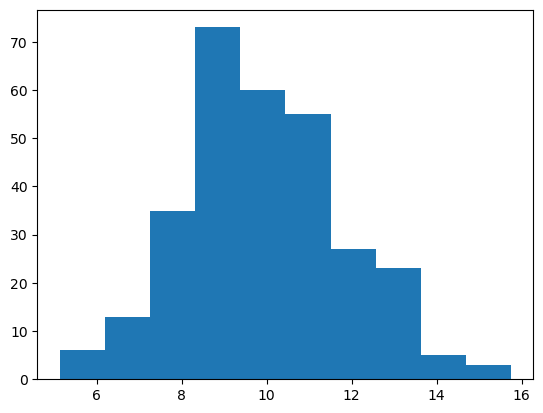

In [208]:
# use a normal distribution to generate data with loc, scale and size showing the mean, std and size of the data
a = stats.norm.rvs(loc=10, scale=2, size=300)
plt.hist(a)
print(stats.describe(a))

test_conclude(stats.normaltest(a), reverse=True)

In [209]:
test_conclude(stats.shapiro(a), reverse=True)

rounded pvalue = 0.147838
ShapiroResult(statistic=0.9926717281341553, pvalue=0.14783771336078644)
pvalue is showing valid study : True.


rounded pvalue = 3.13525e-06
NormaltestResult(statistic=25.3456053258736, pvalue=3.135246799869051e-06)
pvalue is showing valid study : False.


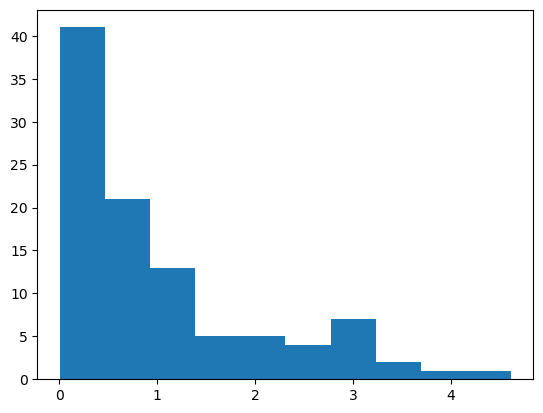

In [210]:
b = stats.expon.rvs(size=100)

plt.hist(b)

test_conclude(stats.normaltest(b), reverse=True)

## Test de Student

Lors d’une enquête sur la durée de sommeil des enfants de 2 à 3 ans, on a trouvé une moyenne de temps de sommeil par nuit de 10.2 h dans un groupe de 40 enfants avec un écart type de 2.1 heures. La moyenne attendue du temps de sommeil est de 11.7 heures chez les enfants de cet âge.

### Note :

Je compare un groupe (tranche d'age) à une norme (moyenne de sommeil chez les enfants de cet age). Ces données sont appariées (tranche d'age, moyenne pour l'age). Grâce à des données quantitatives continues (durée de sommeil) suivant la loi normale relevés et dans le cadre de l'analyse multivariée on choisit le test **t-student pour des données appariées**.

rounded pvalue = 0.789274
NormaltestResult(statistic=0.4732844511145484, pvalue=0.7892736194384676)
pvalue is showing valid study : True.


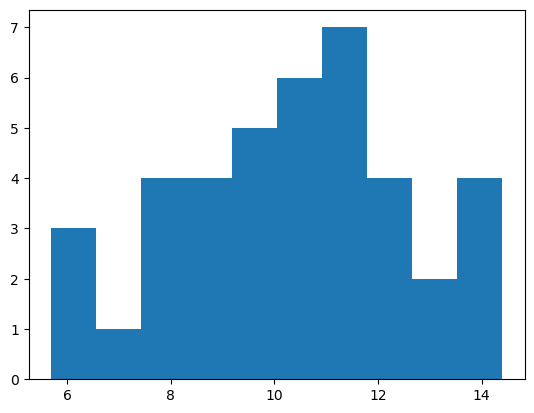

In [211]:
sample = stats.norm.rvs(loc=10.2, scale=2.1, size=40)

sample

plt.hist(sample)

test_conclude(stats.normaltest(sample), reverse=True)

In [212]:
test_conclude(stats.ttest_1samp(sample, popmean=11.7))

rounded pvalue = 0.000689266
TtestResult(statistic=-3.687045737710404, pvalue=0.000689265903965165, df=39)
pvalue is showing valid study : True.


## Test sur Deux groupes indépendants avec une mesure quantitative pour chacun - Analyse multi-variée

> Les tests pouvant être concerné sont : student, mann-whitney, welch

Lors d’une étude sur l’amélioration d’un score (données continue), on a trouvé les résultats suivants sur deux groupes (2 données catégorielles) : un témoin et un ayant subi un test préalable.

<Axes: ylabel='nombre'>

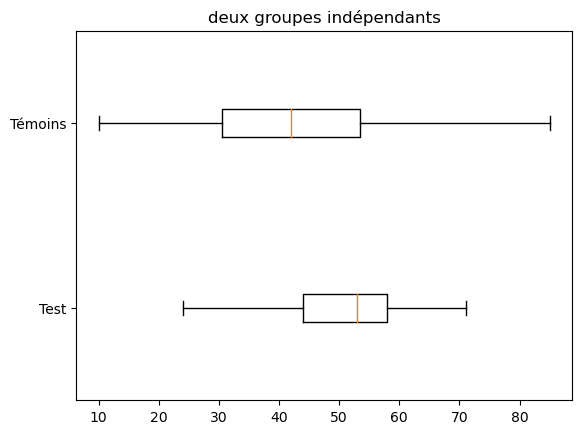

In [213]:
groupe_test = np.array(
    [24, 43, 58, 71, 43, 49, 61, 44, 67, 49, 53, 56, 59, 52, 62, 54, 57, 33, 46, 43, 57]
)
groupe_temoin = np.array(
    [
        42,
        43,
        55,
        26,
        62,
        37,
        33,
        41,
        19,
        54,
        20,
        85,
        46,
        10,
        17,
        60,
        53,
        42,
        37,
        42,
        55,
        28,
        48,
    ]
)
figl, axl = plt.subplots()
axl.set_title("deux groupes indépendants")
groupe = [groupe_test, groupe_temoin]
axl.boxplot(groupe, vert=False, labels=["Test", "Témoins"])

ax

In [214]:
test_conclude(stats.normaltest(groupe_test), reverse=True)
test_conclude(stats.normaltest(groupe_temoin), reverse=True)



rounded pvalue = 0.269542
NormaltestResult(statistic=2.6220648217229954, pvalue=0.2695416349751991)
pvalue is showing valid study : True.
rounded pvalue = 0.553737
NormaltestResult(statistic=1.182131501933375, pvalue=0.5537368245925618)
pvalue is showing valid study : True.


In [215]:
# Les 2 tests précédents ne sont pas normaux donc on utilise Mann Whitney

test_conclude(stats.mannwhitneyu(groupe_test, groupe_temoin))

rounded pvalue = 0.0126778
MannwhitneyuResult(statistic=348.0, pvalue=0.012677815781209313)
pvalue is showing valid study : True.


Ensuite on teste si les variances sont bien homogènes (homoscédasticité) avec levene.

rounded pvalue = 0.13344
LeveneResult(statistic=2.3418185975754007, pvalue=0.133440294168933)
pvalue is showing valid study : False.
Fisher : Les variances sont ~ égales
rounded pvalue = 0.0263824
Ttest_indResult(statistic=2.310889197854228, pvalue=0.02638241282442477)
pvalue is showing valid study : True.


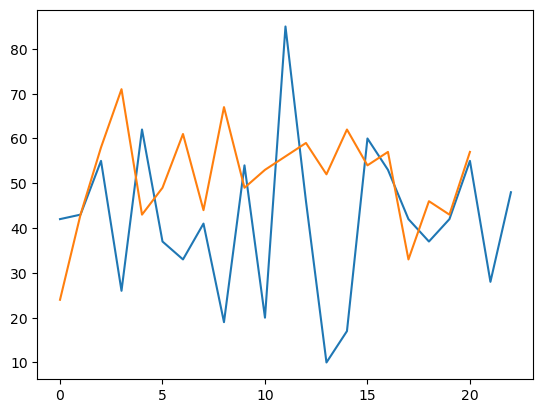

In [216]:
result = stats.levene(groupe_test, groupe_temoin)
test_conclude(result)

plt.plot(groupe_temoin, label="temoin")

plt.plot(groupe_test, label="test")

if result.pvalue > 0.05:
    print("Fisher : Les variances sont ~ égales")
    test_conclude(stats.ttest_ind(groupe_test, groupe_temoin, equal_var=False))
else:
    print("Fisher : Les variances ne sont pas ~ égales")
    test_conclude(stats.ttest_ind(groupe_test, groupe_temoin, equal_var=True))


## Test de Student (Deux séries de données appariées) ou Wilcoxon (Non paramétrique)

On désire étudier l'évolution du volume de globules molaires moyen (VGM) chez les ouvriers embauchés dans une entreprise de
produits chimiques. On dose le VGM chez 19 sujets avant embauche et trois mois après la prise de poste.

rounded pvalue = 0.968303
ShapiroResult(statistic=0.9826169610023499, pvalue=0.9683033227920532)
pvalue is showing valid study : True.
rounded pvalue = 0.644236
ShapiroResult(statistic=0.9635623693466187, pvalue=0.6442355513572693)
pvalue is showing valid study : True.


LeveneResult(statistic=0.0013479107383554936, pvalue=0.9709159543997966)

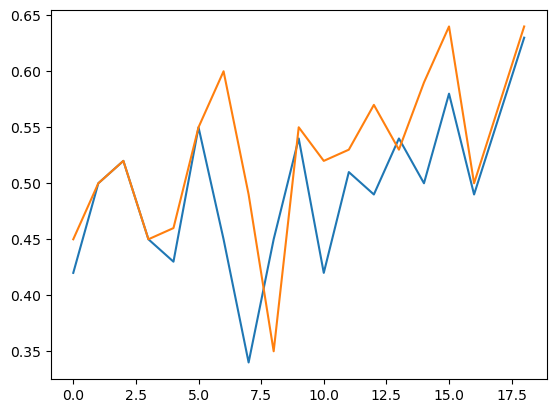

In [217]:
before = np.array([0.42 , 0.5 , 0.52 , 0.45 , 0.43 , 0.55 , 0.45 , 0.34 , 0.45 , 0.54 , 0.42 , 0.51 , 0.49 , 0.54 , 0.5 , 0.58 , 0.49 , 0.56 , 0.63])
after_3_month = np.array([0.45 , 0.5 , 0.52 , 0.45 , 0.46 , 0.55 , 0.60 , 0.49 , 0.35 , 0.55 , 0.52 , 0.53 , 0.57 , 0.53 , 0.59 , 0.64 , 0.5 , 0.57 , 0.64])

figl, axl = plt.subplots()

axl.plot(before)
axl.plot(after_3_month)


test_conclude(stats.shapiro(before), reverse=True)
test_conclude(stats.shapiro(after_3_month), reverse=True)

result = stats.levene(before, after_3_month)

result

In [218]:
test_conclude(stats.ttest_rel(before, after_3_month))

rounded pvalue = 0.0243526
TtestResult(statistic=-2.457703815601802, pvalue=0.024352597586836354, df=18)
pvalue is showing valid study : True.


In [219]:
test_conclude(stats.wilcoxon(before, after_3_month))

rounded pvalue = 0.0122241
WilcoxonResult(statistic=16.0, pvalue=0.012224112319788904)
pvalue is showing valid study : True.


/Users/loic/mambaforge/envs/ml/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


## Test d’ANOVA (paramétrique) et de Kruskal Wallis (non paramétrique) : Plus de deux groupes

Un médecin et un psychologue travaillant dans un centre PMS s’intéressent à trois traitements proposés dans la littérature pour aider des enfants d’école primaire qui ont des problèmes de concentration à l’école.

- La première méthode (T1) consiste à donner chaque matin à l’enfant un médicament proposé par une firme pharmaceutique (risque d’effets secondaires). 
- La deuxième (T2) consiste à donner chaque matin à l’enfant une gélule à base de produits naturels réputés non-nocifs
- la troisième (T3) est basée sur un apprentissage par l’enfant de techniques de relaxation. 

Ces professionnels sont persuadés que les méthodes 2 et 3 donnent chacune de meilleurs résultats que la première et que la troisième méthode est probablement meilleure que la deuxième. Pour confirmer ces hypothèses, ils mettent en place une étude faisant intervenir **15 enfants** (5 enfants par méthode). Ils mesurent la concentration sur base d’indices repris dans une grille d’observations. Plus la mesure est élevée, meilleure est la concentration de l’enfant

Note :

- 3 groupes qualitatifs indépendants en facteur d'étude
- Indépendants, car différents traitements 
- Comparaison à une variable de réponse quantitative continue

<Axes: title={'center': '3 groupes indépendants'}>

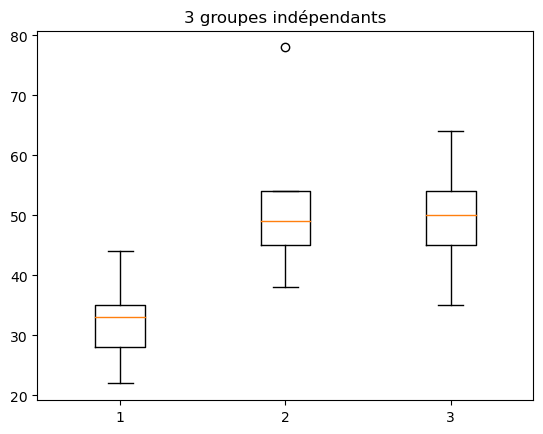

In [220]:
t1 = np.array([22, 28, 44, 35, 33])
t2 = np.array([45, 38, 78, 54, 49])
t3 = np.array([54, 35, 64, 45, 50])

_, axl = plt.subplots()

axl.set_title("3 groupes indépendants")

axl.boxplot([t1, t2, t3])

axl

In [221]:
for obs in [t1, t2, t3]:
    print(stats.describe(obs))

DescribeResult(nobs=5, minmax=(22, 44), mean=32.4, variance=67.3, skewness=0.18662717246788363, kurtosis=-0.9145727034480018)
DescribeResult(nobs=5, minmax=(38, 78), mean=52.8, variance=232.70000000000005, skewness=0.9632785209682523, kurtosis=-0.37319722936348754)
DescribeResult(nobs=5, minmax=(35, 64), mean=49.6, variance=115.30000000000001, skewness=-0.031209354002752474, kurtosis=-0.901841720644287)


In [222]:
test_conclude(stats.levene(t1, t2, t3), reverse=True)

rounded pvalue = 0.745184
LeveneResult(statistic=0.3014521782674013, pvalue=0.745184192753678)
pvalue is showing valid study : True.


In [223]:
test_conclude(stats.shapiro(t1), reverse=True)
test_conclude(stats.shapiro(t2), reverse=True)
test_conclude(stats.shapiro(t3), reverse=True)


rounded pvalue = 0.973657
ShapiroResult(statistic=0.9883646368980408, pvalue=0.9736566543579102)
pvalue is showing valid study : True.
rounded pvalue = 0.349595
ShapiroResult(statistic=0.8884956240653992, pvalue=0.34959524869918823)
pvalue is showing valid study : True.
rounded pvalue = 0.997982
ShapiroResult(statistic=0.9973205924034119, pvalue=0.99798184633255)
pvalue is showing valid study : True.


In [224]:
test_conclude(stats.f_oneway(t1, t2, t3))

rounded pvalue = 0.0380053
F_onewayResult(statistic=4.3477004575006015, pvalue=0.038005321610728095)
pvalue is showing valid study : True.


In [225]:
# Dans le cas du test de Kruskal-Wallis 
test_conclude(stats.kruskal(t1, t2, t3))

rounded pvalue = 0.0218625
KruskalResult(statistic=7.645960502692995, pvalue=0.021862547819700012)
pvalue is showing valid study : True.


### Avec student groupe par groupe

On peut découper les analyses en plusieurs tests de student en faisant des groupes de 2 de données indépendantes à comparer avec les résultats de l'étude (variable de réponse) qui sont des données quantitatives continues suivant la loi normale.

In [226]:
test_conclude(stats.ttest_ind(t1, t2))
test_conclude(stats.ttest_ind(t1, t3))
test_conclude(stats.ttest_ind(t2, t3))

rounded pvalue = 0.0300086
Ttest_indResult(statistic=-2.633628675421043, pvalue=0.030008649845931944)
pvalue is showing valid study : True.
rounded pvalue = 0.0216055
Ttest_indResult(statistic=-2.84618458698243, pvalue=0.021605453111800843)
pvalue is showing valid study : True.
rounded pvalue = 0.711289
Ttest_indResult(statistic=0.38357064118830675, pvalue=0.7112892976167434)
pvalue is showing valid study : False.


## Test de liaisons : Corrélation de Spearmann (Non Paramétrique) et de Bravais-Pearson (Paramétrique)

Les données utilisées dans cet exemple correspondent à une étude lors de laquelle un type de chips a été évalué par 100 consommateurs. 

Chaque consommateur a donné son avis sur l'échelle allant de 1 à 5 (catégoriel) pour quatre attributs (salé, sucré, acidité, croustillant)

1 correspond à "très peu", et 5 à "très", puis a indiqué sa préférence sur une échelle de 1 à 10. Notre but est d'évaluer les corrélations entre les quatre attributs et la préférence.

In [227]:
path = get_dataset_dir('data2.csv')

x = pd.read_csv(path, delimiter=";")

x.head()

,Preference,Sale,Sucre,Acidite,Croustillant
0,1,3,3,3,3
1,1,1,2,3,1
2,1,2,2,5,1
3,1,1,4,3,1
4,2,3,3,2,2


In [228]:
result = stats.spearmanr(x)

result

SignificanceResult(statistic=array([[ 1.        ,  0.27220415,  0.02989934, -0.03451333,  0.46590771],
       [ 0.27220415,  1.        , -0.12160131, -0.07715498,  0.11290395],
       [ 0.02989934, -0.12160131,  1.        , -0.22275703, -0.08096516],
       [-0.03451333, -0.07715498, -0.22275703,  1.        ,  0.15770467],
       [ 0.46590771,  0.11290395, -0.08096516,  0.15770467,  1.        ]]), pvalue=array([[0.00000000e+00, 6.14848772e-03, 7.67764453e-01, 7.33182093e-01,
        1.03482588e-06],
       [6.14848772e-03, 0.00000000e+00, 2.28124899e-01, 4.45470652e-01,
        2.63385455e-01],
       [7.67764453e-01, 2.28124899e-01, 0.00000000e+00, 2.59050072e-02,
        4.23254289e-01],
       [7.33182093e-01, 4.45470652e-01, 2.59050072e-02, 0.00000000e+00,
        1.17104761e-01],
       [1.03482588e-06, 2.63385455e-01, 4.23254289e-01, 1.17104761e-01,
        0.00000000e+00]]))

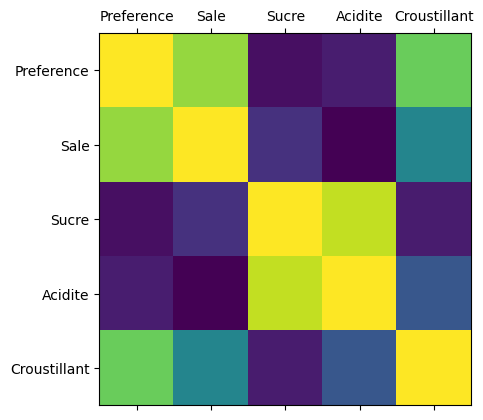

In [229]:
corr = pd.DataFrame(result.pvalue, columns=list(x.columns)).corr()
corr.style.background_gradient()

ax = plt.matshow(corr)

plt.xticks(ticks=range(len(x.columns)), labels=list(x.columns))
plt.yticks(ticks=range(len(x.columns)), labels=list(x.columns))

ax

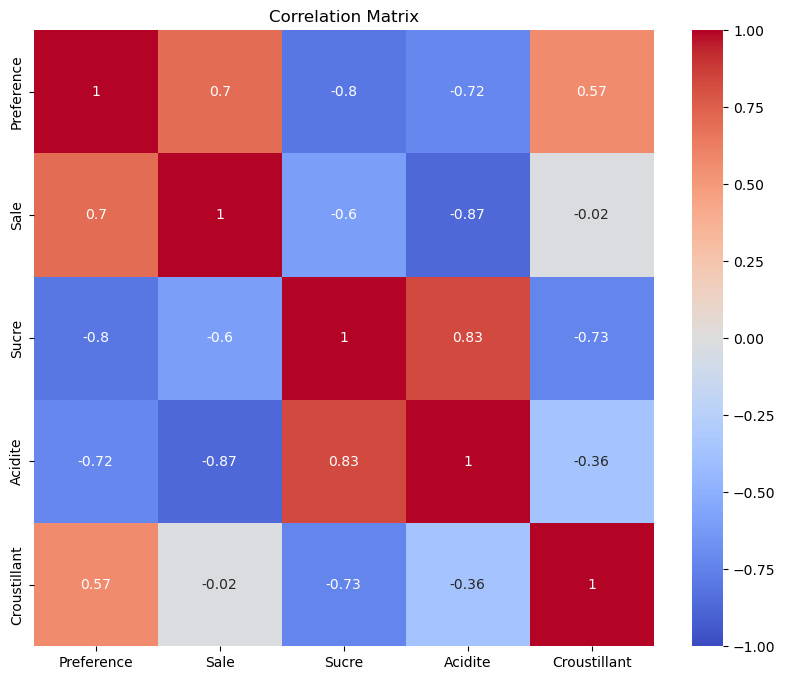

In [230]:
corr_rounded = corr.round(2)

# Create the plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_rounded, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

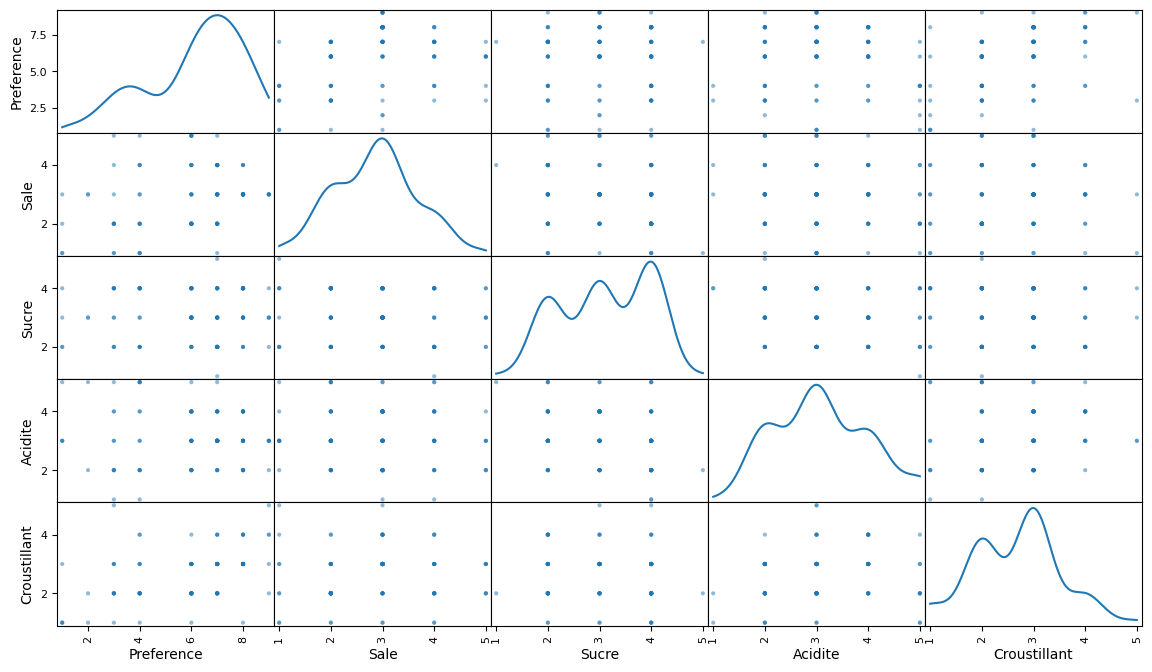

In [231]:
ax = pd.plotting.scatter_matrix(x, figsize=(14, 8), diagonal="kde")

#### Note sur kde
> Kernel Density Estimation

En statistique, l’estimation par noyau est une méthode non-paramétrique d’estimation de la densité de probabilité d’une variable aléatoire. Elle se base sur un échantillon d’une population statistique et permet d’estimer la densité en tout point du support.